In [1]:
import spacy
from spacy import displacy
from spacy.tokens import Span

# my ner model that identifies retail accessories & apparel related products
my_nlp = spacy.load("../output_fin/model-best")

# pretrained model for general tasks like parsing sentence
nlp = spacy.load("en_core_web_sm")

In [2]:
from file_manager import FileManager

file_1 = FileManager('../notebook/input/scarf_google.html')
file_content_1 = file_1.read_file()

In [3]:
ent_doc_1 = my_nlp(file_content_1)
ling_doc_1 = nlp(file_content_1)

In [4]:
from token_analysis import DualDocAnalysis

analyzer_1 = DualDocAnalysis(ling_doc=ling_doc_1,ent_doc=ent_doc_1)

#get main product entities from document
# returns potential important linguistic features related to product
ling_info_1 = analyzer_1.get_all_doc_ent_ling_info()
span_info_1 = analyzer_1.get_related_spans()


In [5]:
displacy.render(ent_doc_1, style="ent")

In [6]:
# this model was only trained on google but can also ID and products 
# on an entirely new website: in this example etsy was used
file_2 = FileManager('../notebook/input/scarf_etsy.html')
file_content_2 = file_2.read_file()
ent_doc_2 = my_nlp(file_content_2)
ling_doc_2 = nlp(file_content_2)
analyzer_2 = DualDocAnalysis(ling_doc=ling_doc_2,ent_doc=ent_doc_2)

#get main product entities from document
# returns potential important linguistic features related to product
ling_info_2 = analyzer_2.get_all_doc_ent_ling_info()
span_info_2 = analyzer_2.get_related_spans()
displacy.render(ent_doc_2, style="ent")

In [14]:
import json
from file_manager import JSONFileManager

stats_file = JSONFileManager('../notebook/all_pipeline_stats.json')
stats = stats_file.read_file()


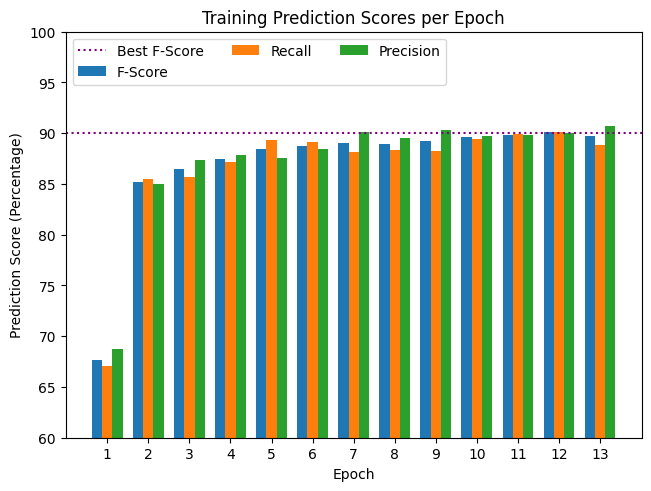

In [87]:
import matplotlib.widgets as wd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
    
# ENTS_P = Precision = Formula: True Pos / (True pos + True Neg), high == few false positives
# ENTS_R = recall = Formula: True Pos / (True pos + True Neg), high == few false negatives
# ENTS_F = harmony of p and r. This is the MAIN quality score. Formula: F1 = 2 * (P * R) / (P + R)
# ner_loss = loss from NER component based on how far the predicted entity spans are from the gold annotations.
epoch =  [int(x) + 1 for x in stats['mean_epoch']['E']]
ents_f = [float(x) for x in stats['mean_epoch']['ENTS_F']]
ents_r = [float(x) for x in stats['mean_epoch']['ENTS_R']]
ents_p = [float(x) for x in stats['mean_epoch']['ENTS_P']]

scores = {
    'F-Score': ents_f,
    'Recall': ents_r,
    'Precision': ents_p
}


width = 0.25 
multiplier = 0
x = np.arange(len(epoch))
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.axhline(round(stats['best']['ENTS_F'],2) * 100, color='purple', linestyle=':', label='Best F-Score')
ax.set_ylabel('Prediction Score (Percentage)')
ax.set_xlabel('Epoch')
ax.set_title('Training Prediction Scores per Epoch')
ax.set_xticks(x + width, epoch)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(60, 100)
plt.show()



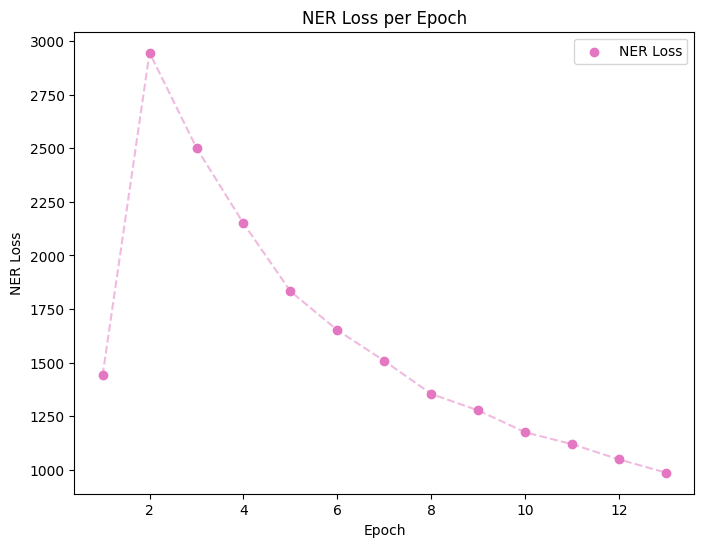

In [91]:

tok2vec_loss = [float(x) for x in stats['mean_epoch']['TOK2VEC_LOSS']]
ner_loss = [float(x) for x in stats['mean_epoch']['NER_LOSS']]



fig, ax = plt.subplots(figsize=(8, 6))

# NER
ax.scatter(epoch, ner_loss, color='tab:pink', label='NER Loss')
ax.plot(epoch, ner_loss, color='tab:pink', linestyle='--', alpha=0.5)
ax.set_xlabel('Epoch')
ax.set_ylabel('NER Loss')
ax.legend(loc='upper right')
ax.set_title('NER Loss per Epoch')
plt.show()
